In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

data = read_data()

group0 = ["PAK", "SDN", "BDI", "HTI"]
group1 = ["EST", "CZE", "MLT", "SGP", "IRL"]
group2 = ["CHE", "ISL", "NZL", "SWE"]

all_groups = group0 + group1 + group2

data = data.loc[all_groups]

# Nb of criteria
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [10, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 18, 12] # Preference thresholds

data.head(3)

utils.py Loading
Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


,co2prod,hdi,le,gdi,eys,mys
iso3,,,,,,
PAK,"[32.817923848999996, 32.839545195, 32.81713493...","[0.394, 0.399, 0.403, 0.405, 0.409, 0.411, 0.4...","[60.066, 60.259, 60.116, 59.934, 60.116, 59.87...","[0.539, 0.57, 0.576, 0.585, 0.598, 0.589, 0.60...","[4.238239765, 4.280649002, 4.323058238, 4.3654...","[2.291861259, 2.390371085, 2.488880911, 2.5873..."
SDN,"[33.179499414999995, 33.197418881, 33.22244834...","[0.322, 0.328, 0.318, 0.328, 0.371, 0.361, 0.3...","[49.732, 50.213, 45.891, 46.575, 56.644, 51.99...","[0.755, 0.76, 0.795, 0.805, 0.762, 0.794, 0.80...","[3.575123192, 3.716464477, 3.863393641, 4.0161...","[1.5, 1.594, 1.688, 1.782, 1.876, 1.97, 2.064,..."
BDI,"[33.367526346999995, 33.363043413999996, 33.36...","[0.285, 0.287, 0.284, 0.257, 0.288, 0.284, 0.2...","[44.86, 44.227, 43.895, 37.105, 44.08, 44.059,...","[0.822, 0.824, 0.814, 0.832, 0.823, 0.829, 0.8...","[4.218900204, 4.333489895, 4.203050137, 4.4798...","[1.460590005, 1.514265001, 1.567939997, 1.6216..."


In [ ]:
def get_clusters_evolution(data, P, Q, W, K, L, k=3, prototype_method="seed", seed=None):
    """ 
    Get the evolution of the clusters over time using the K-Medoids with Eta distances
    - data: Dataframe with the alternatives
    - P: Preference thresholds
    - Q: Indifference thresholds
    - W: Weights of the criteria
    - K: Number of criteria
    - L: Length of the time series
    - k: Number of clusters to form (for the K-Medoids algorithm)
    """

    alternatives = data.index
    # Get the temporal_eta matrix
    phi_c_all = pf.get_all_Phi_c(data, P, Q)
    temporal_eta = pf.get_eta_matrix(data, phi_c_all, W, L)

    # Get the clusters evolution
    clusters_evolution = []
    medoids_evolution = []
    iterations = []

    for t in tqdm(range(L)):
        eta_matrix = temporal_eta[:,:,t]
        eta_matrix = pd.DataFrame(eta_matrix, index=alternatives, columns=alternatives)
        medoids, clusters, _ = cf.K_Medoid_Eta(alternatives, eta_matrix, k, prototype_method=prototype_method, print_results=False, seed=seed)
        clusters_evolution.append(clusters)
        medoids_evolution.append(medoids)
        iterations.append(t)

    return clusters_evolution, medoids_evolution, iterations


def transform_clusters_evolutions(clusters_evolution):
    """
    Transform the clusters evolution into a dataframe
    - clusters_evolution: List of the clusters evolution over time
    """
    evol = []
    for i in clusters_evolution:
        temp = []
        for key, value in i.items():
            temp.append(value)
        evol.append(temp)
    return pd.DataFrame(evol)

In [ ]:
seed = ["PAK", "EST", "CHE"]
clusters_evolution, medoids_evolution, iterations = get_clusters_evolution(data, P, Q, W, K, L, k=3, prototype_method="seed", seed=seed)


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]
100%|██████████| 33/33 [00:00<00:00, 438.57it/s]


In [6]:
clusters_evolution_df = transform_clusters_evolutions(clusters_evolution)
clusters_evolution_df

,0,1,2
0,"[SDN, BDI]","[EST, PAK, HTI, MLT]","[IRL, CZE, SGP, CHE, ISL, NZL, SWE]"
1,"[SDN, PAK, BDI]","[EST, HTI, MLT]","[SGP, CZE, IRL, CHE, ISL, NZL, SWE]"
2,"[SDN, PAK, BDI]","[SGP, HTI, EST, CZE, MLT, IRL]","[CHE, ISL, NZL, SWE]"
3,"[PAK, SDN, BDI, HTI]","[SGP, EST, CZE, MLT, IRL]","[SWE, CHE, ISL, NZL]"
4,"[SDN, PAK, BDI, HTI]","[SGP, EST, CZE, MLT, IRL]","[SWE, CHE, ISL, NZL]"
5,"[PAK, SDN, BDI, HTI]","[MLT, CZE, SGP, IRL]","[SWE, EST, CHE, ISL, NZL]"
6,"[PAK, SDN, BDI, HTI]","[SGP, EST, CZE, MLT, IRL]","[ISL, CHE, NZL, SWE]"
7,"[PAK, SDN, BDI, HTI]","[SGP, EST, CZE, MLT, IRL]","[ISL, CHE, NZL, SWE]"
8,"[BDI, PAK, SDN]","[EST, HTI, MLT, SGP, IRL, ISL, SWE]","[CHE, CZE, NZL]"
9,"[PAK, SDN, BDI, HTI]","[EST, MLT, SGP, IRL, ISL, SWE]","[CHE, CZE, NZL]"


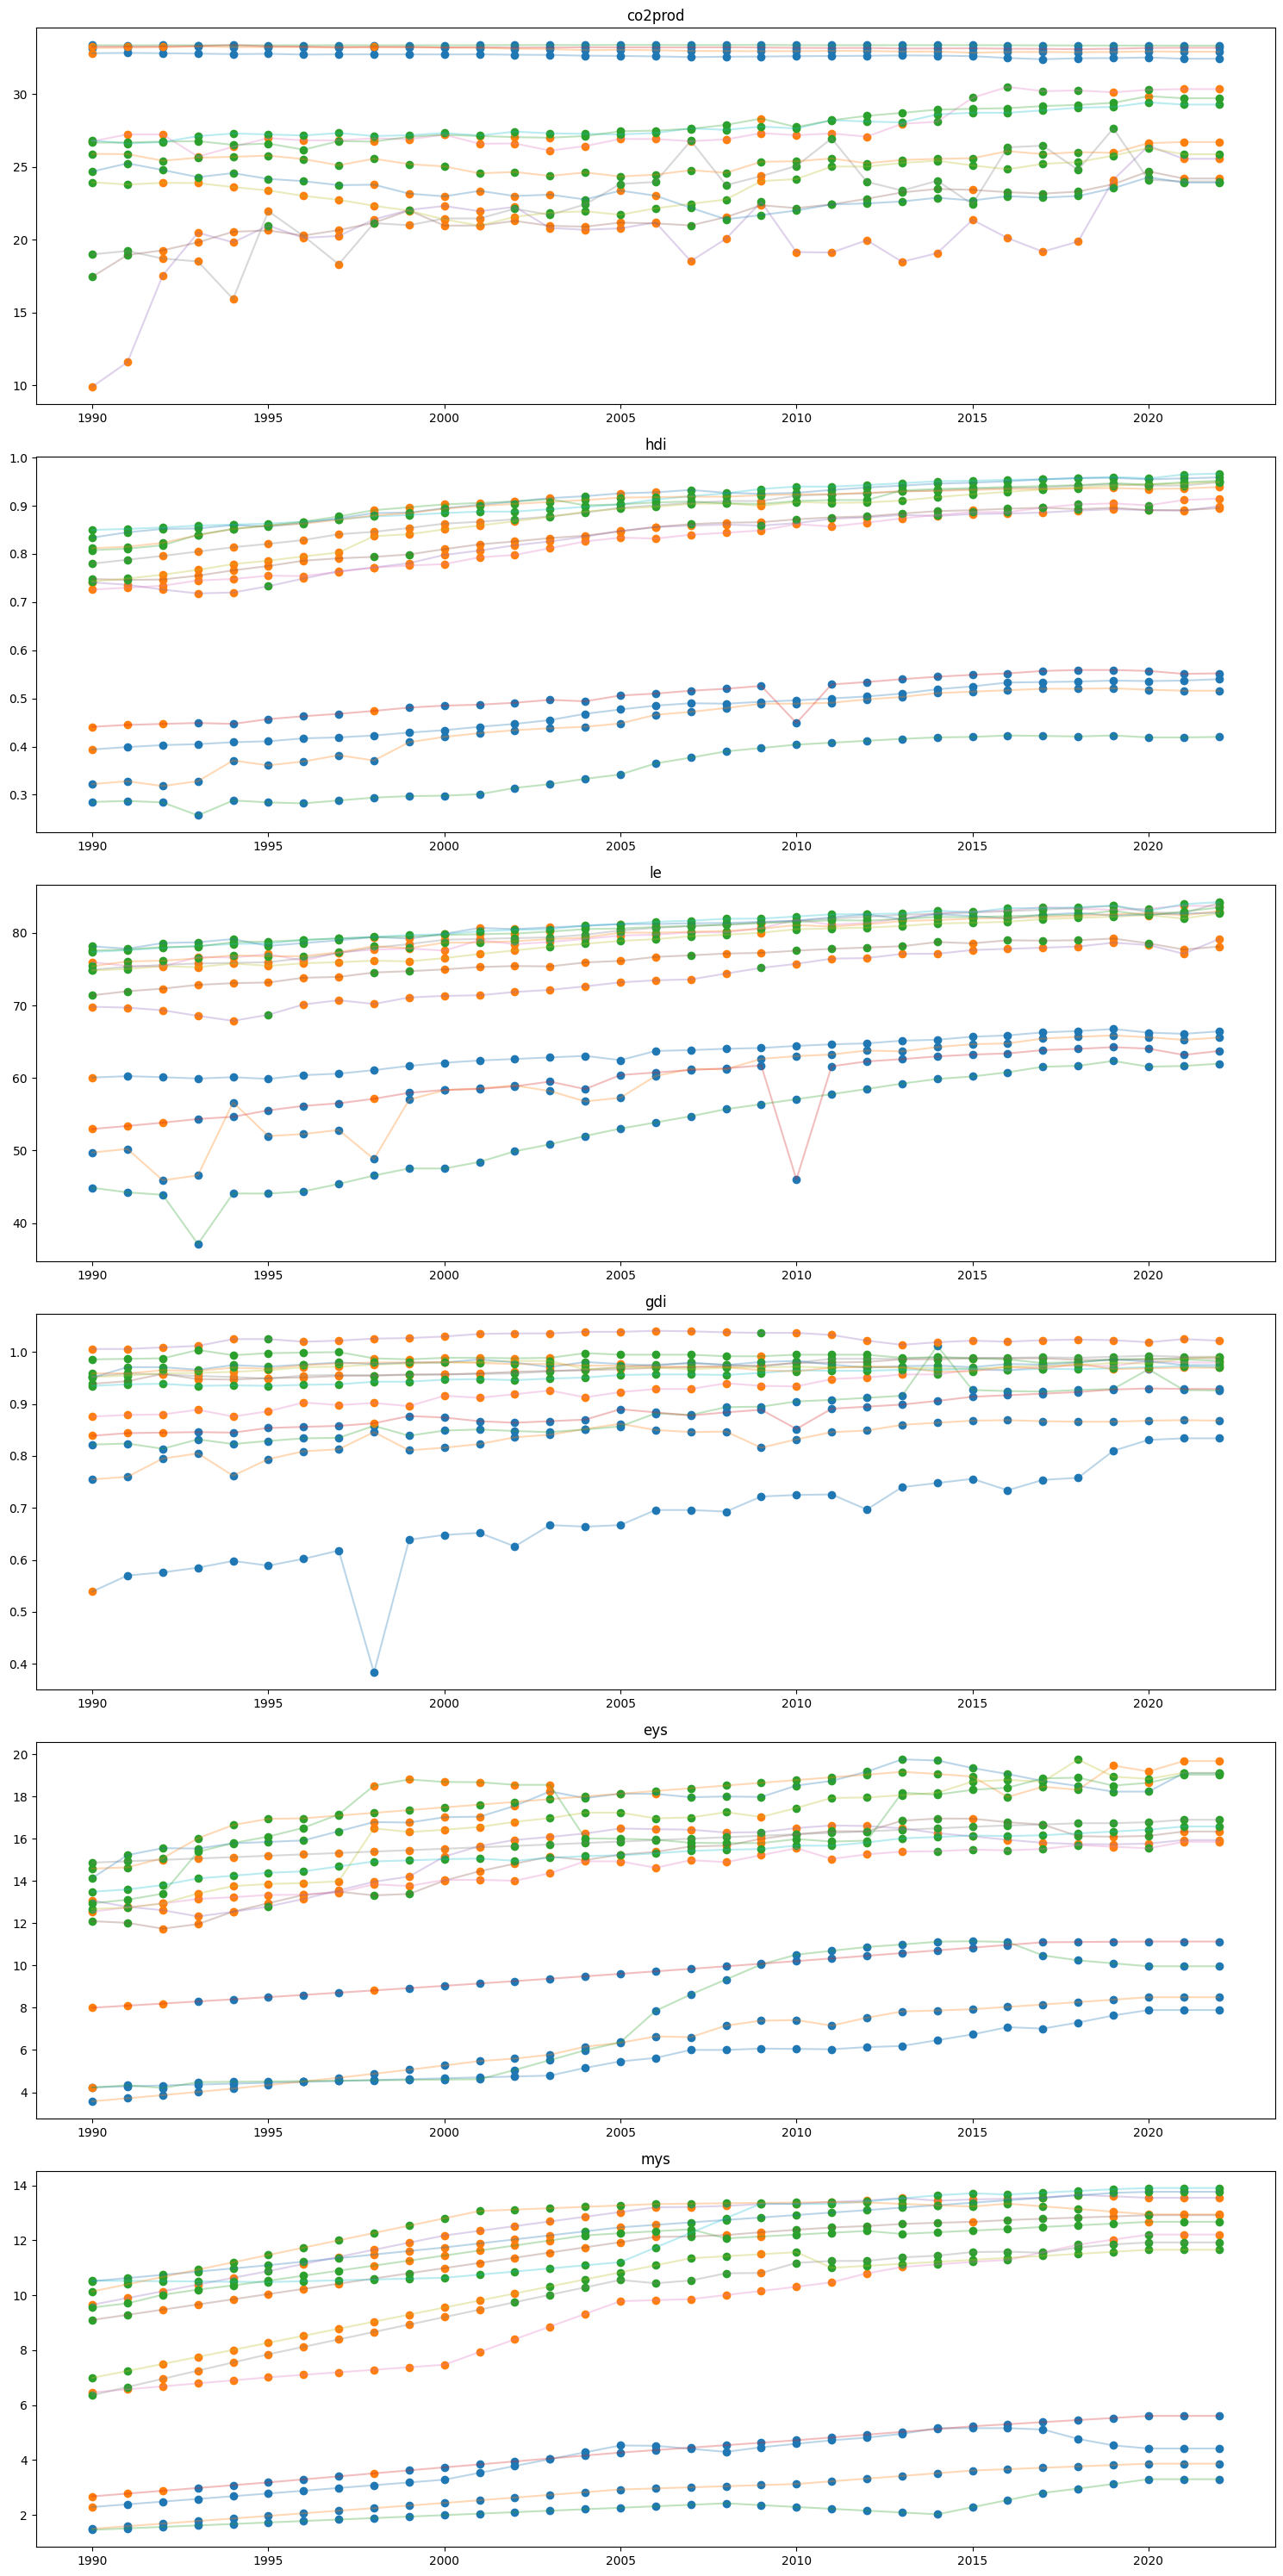

In [7]:
def plot_cluster_evolution(cluster_evolution_df, data, legend=False):
    """ 
    Plot the evolution of the clusters over time
    - cluster_evolution_df: Dataframe with the clusters evolution over time	
        - rows: time steps t
        - columns: clusters i
        - values: list of alternatives in the cluster i at time t
    - data: Dataframe with the 
    
    Print clusters by color (i.e. cluster 0 in blue, cluster 1 in red, etc.)
    But the color of the countries in the cluster is not consistent over time

    """
    x = np.arange(1990, 2023)
    Nb_cols = len(data.columns)
    fig, axs = plt.subplots(Nb_cols, 1, figsize=(15, 30))
    axs = axs.flatten()

    for i, col in enumerate(data.columns[:]): # Loop over the columns of the data (criteria)
        for _, row in data.iterrows():
            axs[i].plot(x, row[col], label=row.name, alpha=0.3) 
        for t in cluster_evolution_df.index: # Loop over the time steps
            for j, cluster in enumerate(cluster_evolution_df.loc[t]): # Loop over the clusters
                if cluster != None:
                    for country in cluster: # Loop over the countries in the cluster
                        if country in data.index:
                            axs[i].scatter(x[t], data.loc[country, col][t], color=f"C{j}", label=f"Cluster {j}")
        axs[i].set_title(col)
        if legend:
            axs[i].legend()  # Add legend here


    plt.tight_layout()
    plt.show()


plot_cluster_evolution(clusters_evolution_df, data, legend=False)

# 2 - Entire dataset


In [8]:
data = read_data()
# Nb of criteria
K = data.columns.shape[0] # Nb of criteria
L = data.iloc[0]["co2prod"].shape[0] # Length of the time series

W = [1/K for i in range(K)] # Weights of the criteria (equal weights)
Q = [4, 0.3, 40,  0.4, 4, 2] # Indifference thresholds
P = [28, 0.9, 80, 1, 20, 12] # Preference thresholds

Weight_vector = [1/L for _ in range(L)] # Equal weights times

Reading HDI dataset
co2prod: min=0.0, max=33.3863
hdi: min=0.257, max=0.967
le: min=37.105, max=85.473
gdi: min=0.383, max=1.041
eys: min=3.5751, max=23.2477
mys: min=1.4606, max=14.2559


c:\Users\raphu\Documents\ULB\MA2\ulb-master-thesis\code\src\utils\promethee_functions.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = a_i[c] - a_j[c]
100%|██████████| 33/33 [00:01<00:00, 25.65it/s]


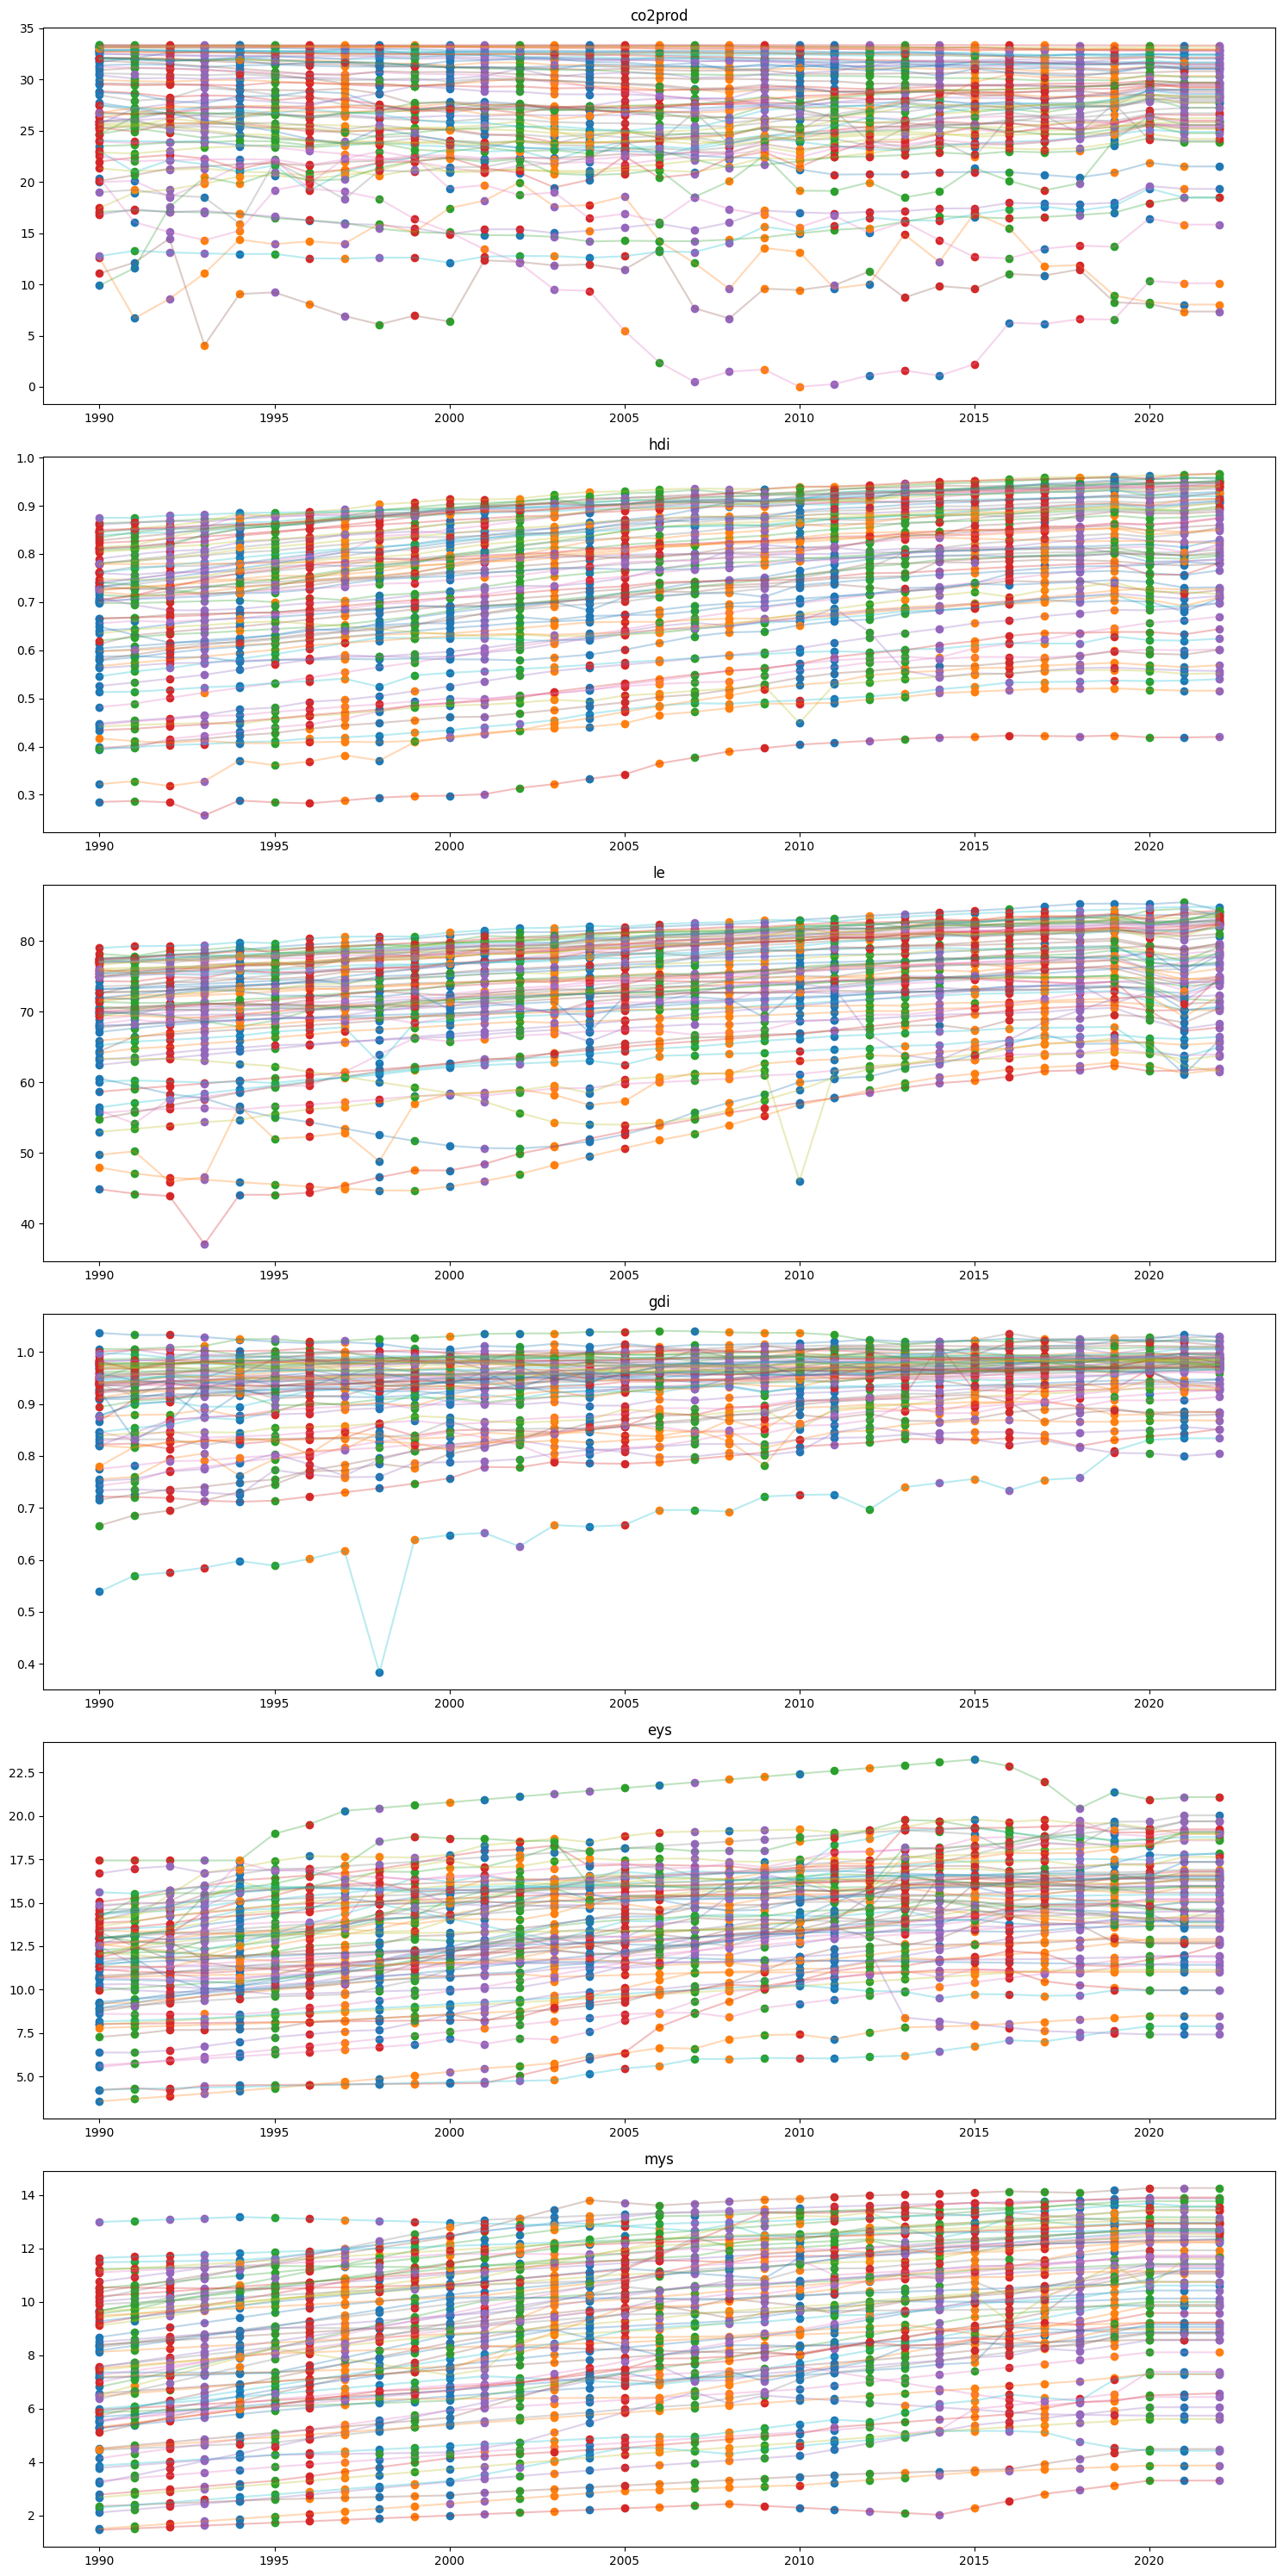

In [9]:
clusters_evolution, medoids_evolution, iterations = get_clusters_evolution(data, P, Q, W, K, L, k=5, prototype_method="random")

clusters_evolution_df = transform_clusters_evolutions(clusters_evolution)

plot_cluster_evolution(clusters_evolution_df, data, legend=False)


In [10]:
clusters_evolution_df

,0,1,2,3,4
0,"[EST, ALB, ARG, BGD, BRB, BOL, BWA, BGR, BDI, ...",[ZMB],[NPL],"[MUS, AUS, AUT, BHS, BHR, BEL, BRN, CAN, CZE, ...","[MLT, SGP, USA]"
1,"[IRN, BHR, BRN, CZE, EST, SAU, TTO]","[ZAF, SGP]","[USA, ALB, ARG, AUT, BHS, BGD, BRB, BEL, BOL, ...","[JPN, AUS, CAN]",[TUR]
2,[AUT],[ITA],[MLT],"[AUS, ALB, ARG, BHS, BGD, BRB, BWA, BGR, BDI, ...","[BOL, BHR, BEL, BRN, CAN, CZE, EST, DEU, IRL, ..."
3,[SGP],"[CHN, BHR, BRN, CZE, EST, SAU, TTO]",[GBR],"[NPL, PAK]","[USA, ALB, ARG, AUS, AUT, BHS, BGD, BRB, BEL, ..."
4,"[USA, ALB, ARG, AUT, BHS, BGD, BRB, BEL, BOL, ...","[MUS, AUS, BHR, BRN, CAN, CZE, EST, SAU, SGP, ...",[POL],[TUR],[DEU]
5,[CZE],[BGR],"[USA, ALB, ARG, AUS, AUT, BHS, BGD, BRB, BEL, ...",[IDN],"[MUS, BHR, BRN, CAN, EST, SAU, TTO]"
6,"[BEL, CAN]","[NPL, BHR, BRN, PAK, TTO]",[FIN],"[USA, ALB, ARG, AUS, AUT, BHS, BGD, BRB, BOL, ...",[IRL]
7,"[DNK, AUS]","[USA, ARG, AUT, BHS, BGD, BRB, BEL, BOL, BWA, ...",[ZAF],[EGY],"[ALB, BHR, BRN, CAN, EST, NOR, SAU, SGP, TTO]"
8,"[CZE, ALB, ARG, BHS, BGD, BRB, BOL, BWA, BGR, ...","[ESP, BEL, CAN, DNK, DEU, HKG, NLD, NOR]","[SYR, BHR, BRN, EST, SAU, TTO]","[PRT, AUT, FIN, FRA, GHA, GRC, ISL, IRL, ISR, ...","[NZL, AUS, SWE, USA]"
9,"[MUS, GHA]","[PAK, BDI, MAR, NPL, SDN]","[AUS, ALB, ARG, AUT, BGD, BRB, BOL, BWA, BGR, ...","[LCA, BHS, BHR, BRN, CAN, CYP, CZE, GRC, IRL, ...","[POL, BEL]"
